In [ ]:
#Facial Biometric
#Dataset

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np   # bring NumPy library into the current environment and give NumPy the alias of np
import cv2

In [2]:
img_size=224


In [4]:
# Take a photo via camera using OpenCV. Take a photo with space and exit with ESC. 


cam = cv2.VideoCapture(0)

cv2.namedWindow("photo")

img_counter = 0

while True:
    # capture frame-by-frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("photo", frame)

    k = cv2.waitKey(1)  # we wait for 1 milliseconds
    if k%256 == 27:
        
        print("Escape hit, closing...")
        break  # ESC to quit
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_image_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
# close the window 
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)


Escape hit, closing...


#Face Recognition

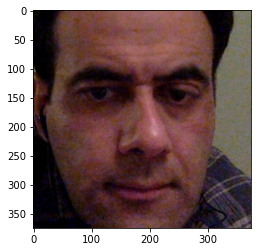

In [3]:
# detect the face in an image 

gray=cv2.imread("outputImage.jpg")

plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))  #show the image

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_grey=gray[y:y+h,x:x+w]
    facess=faceCascade.detectMultiScale(roi_grey) # make sure I need it
    if len(facess)==0:
        print("Face not detected")
    else:
        pass
plt.imshow(cv2.cvtColor(roi_grey,cv2.COLOR_BGR2RGB))   # detect and show the face

In [4]:
# Importing Tensorflow and then training the deep learning model with transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

read all the images and converting them to array


I used Google Colab, but it crahsed due to limited RAM access.

In [ ]:
#Emotion Detection with photo- the architecture or classes

emotion_dict= {'Angry': 5, 'Sad': 1, 'Neutral': 4, 'Disgust': 6, 'Surprise': 3, 'Fear': 2, 'Happy': 0}

In [45]:
#save the target Train set   may delete
np.save('Y',Y_train)

In [5]:
new_model=tf.keras.models.load_model('Final_model_40epoch.h5')  #load the model for testing

2022-06-27 06:36:50.645065: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The link for setting up CoLAb GPU
https://medium.com/dataman-in-ai/start-using-google-colab-free-gpu-7968acb7ef92


In [51]:
new_model=tf.keras.models.load_model('Final_model_95.h5') 

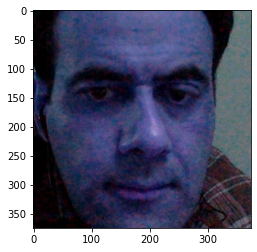

In [6]:
plt.imshow(roi_grey) 

In [7]:
# resize the image size and 
final_image = cv2.resize(roi_grey, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0
font = cv2.FONT_HERSHEY_SIMPLEX
Predictions = new_model.predict(final_image)


In [8]:
r=np.argmax(Predictions)
r

5

In [ ]:
    conv_base = VGG16(include_top=False,
                      weights='imagenet',
                      input_shape=(image_size, image_size, 3))
    for layer in conv_base.layers[:-2]:
        layer.trainable = False
    model = Sequential()
    model.add(conv_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(classes, activation='softmax'))

In [ ]:
#consider various epochs